In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)

In [2]:
# коэффициенты системы (НЧ фильтр 9-го порядка)
w_sys = [0.023713, 0.067547, 0.126708, 0.179057, 0.200066, 0.179057, 0.126708, 0.067547, 0.023713]
N = len(w_sys)

num_points = 20000

# случайное входное воздействие
x = np.random.uniform(-1, 1, num_points)

# реакция системы на входное воздействие
s = np.zeros(num_points)
for i in range(N, num_points):
    # отклик системы - скалярное произведение входных отсчетов и коэффициентов
    s[i] = np.dot(w_sys, x[i:i-N:-1])

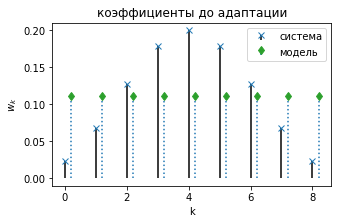

In [3]:
# инициализация коэффициентов модели
N = 9
w = np.ones(N) / N

# коэффициенты системы и коэффициенты модели
plt.stem(np.arange(N), w_sys, 'k', markerfmt='x', use_line_collection=True, basefmt=" ")
plt.stem(np.arange(N) + 0.2, w, 'k', markerfmt='d', use_line_collection=True, basefmt=" ",  linefmt=':')
plt.xlabel('k')
plt.ylabel('$w_{k}$')
plt.title(u'коэффициенты до адаптации')
plt.legend([u'система', u'модель'])
plt.savefig('рисунок-1-2.png')
plt.savefig('рисунок-1-2.svg')

In [4]:
# норма обучения (скорость адаптации)
mu = 1e-3

# отклик модели
y = np.zeros(num_points)

# адаптация
for i in range(N, num_points):
    # отклик модели - скалярное произведение последних N отсчетов и b
    y[i] = np.dot(w, x[i:i-N:-1])
    # ошибка - разница между откликом модели и откликом системы
    e = y[i] - s[i]
    # подстройка коэффициентов (все коэффициенты подстраиваются сразу)
    grad_e = e * x[i:i-N:-1]
    w -= mu * grad_e

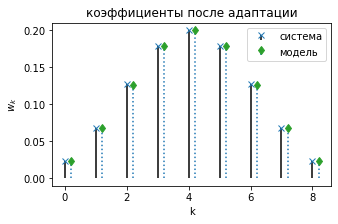

In [5]:
# коэффициенты системы и коэффициенты модели
plt.stem(np.arange(N), w_sys, 'k', markerfmt='x', use_line_collection=True, basefmt=" ")
plt.stem(np.arange(N) + 0.2, w, 'k', markerfmt='d', use_line_collection=True, basefmt=" ", linefmt=':')
plt.xlabel('k')
plt.ylabel('$w_{k}$')
plt.title(u'коэффициенты после адаптации')
plt.legend([u'система', u'модель'])
#plt.show()
plt.savefig('рисунок-1-3.svg')
plt.savefig('рисунок-1-3.png')

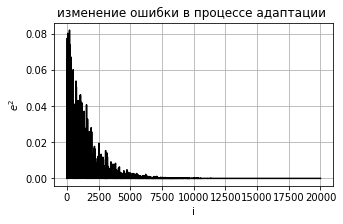

In [6]:
plt.plot((y - s)**2, 'k')
plt.grid()
plt.xlabel('i')
plt.ylabel('$e^{2}$')
plt.title(u'изменение ошибки в процессе адаптации ')
plt.savefig('рисунок-1-4.svg')
plt.savefig('рисунок-1-4.png')